Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


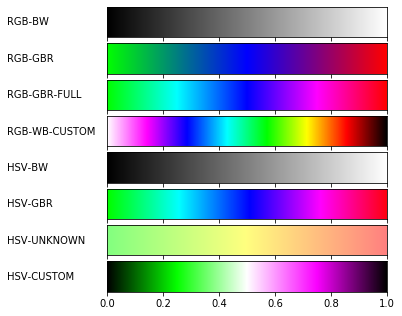

In [4]:
from __future__ import division             # Division in Python 2.7
import matplotlib
matplotlib.use('Agg')                       # So that we can render files without GUI
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
%matplotlib inline
import colorsys
import math

from matplotlib import colors

def plot_color_gradients(gradients, names):
    # For pretty latex fonts (commented out, because it does not work on some machines)
    #rc('text', usetex=True) 
    #rc('font', family='serif', serif=['Times'], size=10)
    rc('legend', fontsize=10)

    column_width_pt = 400         # Show in latex using \the\linewidth
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('my-gradients.pdf')

def hsv2rgb(h, s, v):
    wyn = colorsys.hsv_to_rgb(h, s, v)
    h = wyn[0]
    s = wyn[1]
    v = wyn[2]
    return (h, s, v)

def gradient_rgb_bw(v):
    return (0+v, 0+v, 0+v)


def gradient_rgb_gbr(v):
    if v < 0.5:
        return (0, 1-2*v, 2*v)
    else:
        return (2*(v-0.5), 0, 1-2*(v-0.5))


def gradient_rgb_gbr_full(v):
    if v < 0.25:
        return (0, 1, 4*v)
    elif v < 0.5:
        return (0, 1-4*(v-0.25), 1)
    elif v < 0.75:
        return (4*(v-0.5), 0, 1)
    else:
        return (1, 0, 1-4*(v-0.75))


def gradient_rgb_wb_custom(v):
    if v < 0.143:
        return (1, 1-7*v, 1)
    elif v < 0.286:
        return (1-7*(v-0.143), 0, 1)
    elif v < 0.429:
        return (0, 7*(v-0.286), 1)
    elif v < 0.571:
        return (0, 1, 1-7*(v-0.429))
    elif v < 0.714:
        return (7*(v-0.571), 1, 0)
    elif v < 0.857:
        return (1, 1-7*(v-0.714), 0)
    else:
        return (1-7*(v-0.857), 0, 0)


def gradient_hsv_bw(v):
    return hsv2rgb(0, 0, v)


def gradient_hsv_gbr(v):
    return hsv2rgb(0.33+(v*0.66), 1, 1)

def gradient_hsv_unknown(v):
    return hsv2rgb(0.33-(v*0.33), 0.5, 1)


def gradient_hsv_custom(v):
    if v < 0.25:
        return hsv2rgb(0.33, 1, 4*v)
    elif v < 0.5:
        return hsv2rgb(0.33, 1-4*(v-0.25), 1)
    elif v < 0.75:
        return hsv2rgb(0.5+0.33, 4*(v-0.5), 1)
    else:
        return hsv2rgb(0.5+0.33, 1, 1-4*(v-0.75))


if __name__ == '__main__':
    def toname(g):
        return g.__name__.replace('gradient_', '').replace('_', '-').upper()

    gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

    plot_color_gradients(gradients, [toname(g) for g in gradients])